In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [27]:
dataset=pd.read_csv("50_Startups.csv")

In [29]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [31]:
#Independent and Dependent variable split
X=dataset[['R&D Spend','Administration','Marketing Spend']]
Y=dataset[['Profit']]

In [33]:
# Standardize X variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)  

In [35]:
# 2. Fit an OLS Model
model = sm.OLS(Y, X_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           4.53e-30
Time:                        14:04:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   1305.649     85.791      0.0

In [37]:
# 3. Homoscedasticity Tests
residuals = model.resid
fitted_values = model.fittedvalues

In [39]:
# (a) Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_scaled)
print(f"Breusch-Pagan Test: p-value = {bp_test[1]:.4f}")

Breusch-Pagan Test: p-value = 0.3729


In [41]:
# (b) White test
white_test = het_white(residuals, X_scaled)
print(f"White Test: p-value = {white_test[1]:.4f}")

White Test: p-value = 0.1922


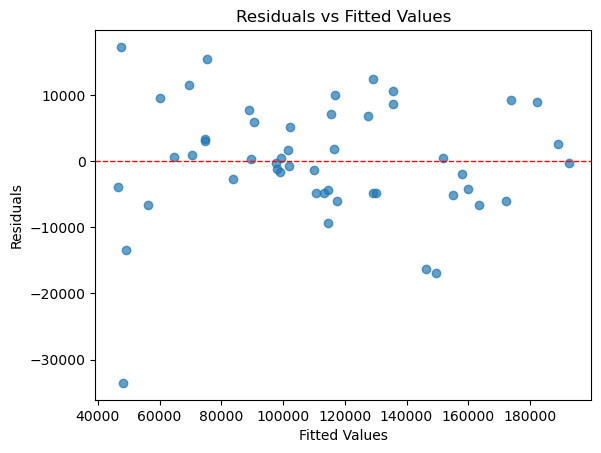

In [43]:
# (c) Residuals vs Fitted Values Plot
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()